   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

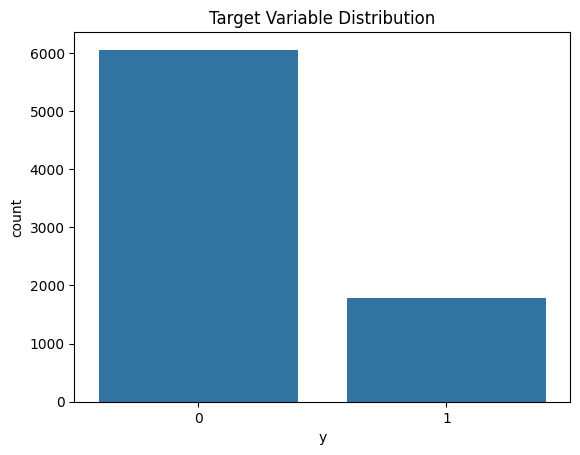

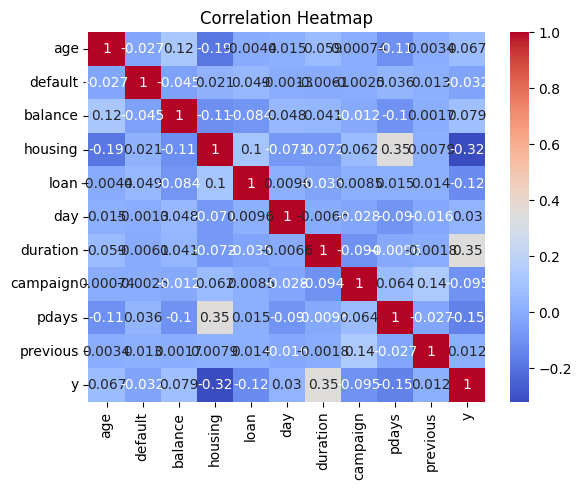

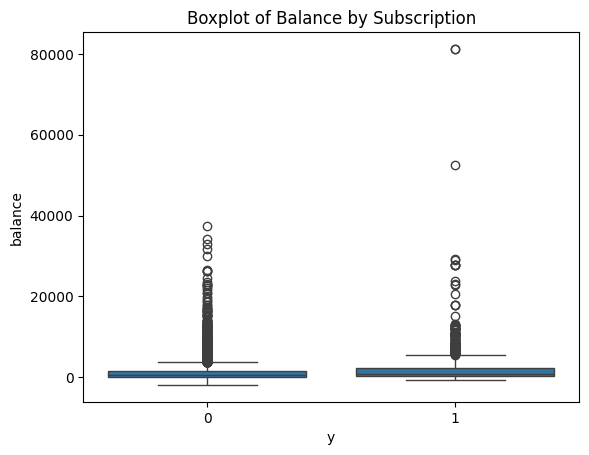

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an erro

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1839
           1       0.87      0.87      0.87      1795

    accuracy                           0.87      3634
   macro avg       0.87      0.87      0.87      3634
weighted avg       0.87      0.87      0.87      3634

Confusion Matrix:
 [[1608  231]
 [ 239 1556]]
ROC-AUC Score: 0.940


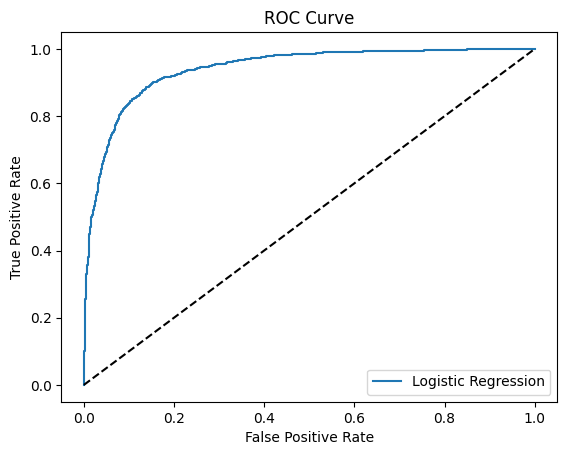

Top Features in Predicting Subscription:
                Feature  Importance
36     poutcome_success    1.959115
30            month_mar    0.035092
5              previous    0.016836
1                   day    0.015406
2              duration    0.004178
4                 pdays    0.000345
0               balance    0.000029
29            month_jun   -0.022699
20            default_1   -0.063752
37            age_group   -0.091368
34            month_sep   -0.130564
3              campaign   -0.167741
28            month_jul   -0.208790
33            month_oct   -0.210080
24            month_aug   -0.222751
25            month_dec   -0.302320
15       job_unemployed   -0.303323
13          job_student   -0.305262
8         job_housemaid   -0.515657
35       poutcome_other   -0.602850
11    job_self-employed   -0.615450
7      job_entrepreneur   -0.745355
12         job_services   -0.809912
9        job_management   -0.821293
19   education_tertiary   -0.920331
16      marital_married

In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# 2. Load and Inspect Data
file_path = r'C:\Users\hbempong\OneDrive - Imperial General Assurance\Desktop\azubi_dataset\data 1\data\bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')
print(data.head())
print(data.info())

# 3. Handle Missing Values and Encode Binary/Unknown Values
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
binary_columns = ['default', 'housing', 'loan', 'y']

# Map binary columns
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Replace 'unknown' with NaN
data[categorical_columns] = data[categorical_columns].replace('unknown', np.nan)
print("Missing values per column:\n", data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# 4. Exploratory Data Analysis (EDA)
# Visualize Target Distribution
sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution")
plt.show()

# Correlation Heatmap for Numerical Features
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to Detect Outliers
sns.boxplot(x='y', y='balance', data=data)
plt.title("Boxplot of Balance by Subscription")
plt.show()

# 5. Feature Engineering
# One-Hot Encoding for Categorical Features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Binning Age into Age Groups
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Encode Age Group using Label Encoding
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])

# Drop 'age' if redundant
data = data.drop(columns=['age']) 

# 6. Define Features and Target Variable
X = data.drop('y', axis=1)
y = data['y']

# Handle Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 7. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 8. Build Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 9. Evaluate Model Performance
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 10. Insights and Findings
print("Top Features in Predicting Subscription:")
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_[0]})
print(feature_importance.sort_values(by='Importance', ascending=False))
